In [1]:
import numpy as np
import pandas as pd

<Axes: xlabel='x', ylabel='y'>

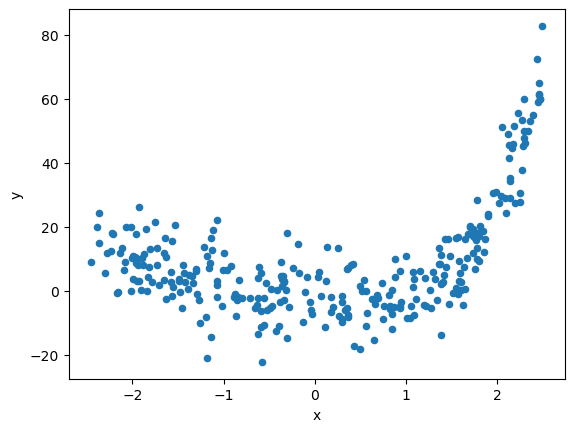

In [2]:
import numpy as np
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')


In [3]:
df

,x,y
0,0.880941,9.836820
1,0.746038,-8.740696
2,-1.297717,6.164998
3,-1.757958,21.446817
4,-1.569210,15.580682
...,...,...
295,0.864926,-4.882181
296,0.932634,-5.218729
297,2.444505,58.986301
298,1.082932,3.749789


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [6]:

# df = pd.DataFrame(columns = ['train_mse','test_mse'], index = ['lin_reg', 'knn_3_reg', 'knn_5_reg',
# 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])
# df

In [7]:
# hejka = [[100,100],
#         [200,200],
#         [300,300],
#         [400,400],
#         [500,500],
#         [600,600],
#         [700,700],
#         ]
# df = pd.DataFrame(data = hejka, columns = ['train_mse','test_mse'], index = ['lin_reg', 'knn_3_reg', 'knn_5_reg',
# 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'] )
# df

In [8]:
#regresja liniowa
from sklearn.linear_model import LinearRegression


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_train_pred = lin_reg.predict(X_train)


In [11]:
lin_reg.intercept_

array([8.94025125])

In [12]:
lin_reg.coef_

array([[5.1103336]])

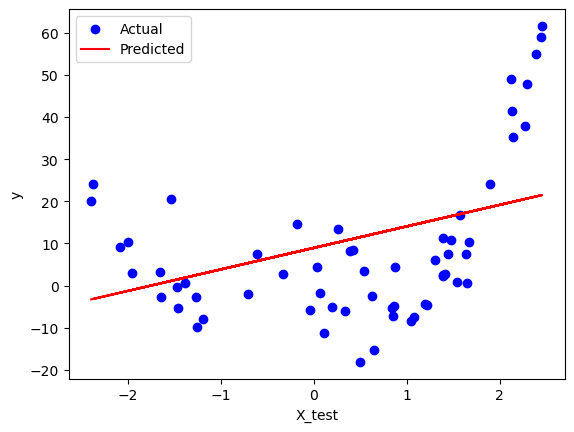

In [13]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = lin_reg.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error


In [15]:
row = []

row.append(mean_squared_error(y_train, y_train_pred))



In [16]:

y_pred = lin_reg.predict(X_test)
row.append(mean_squared_error(y_test, y_pred))
row

[238.19171336611691, 280.6816442893645]

In [17]:
all = []
all.append(row)
all

[[238.19171336611691, 280.6816442893645]]

In [18]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [19]:
row = []
row.append(mean_squared_error(y_train, knn_3_reg.predict(X_train)))
row.append(mean_squared_error(y_test, knn_3_reg.predict(X_test)))
all.append(row)
all

[[238.19171336611691, 280.6816442893645],
 [39.3634997583248, 83.34172977053294]]

In [20]:
import sklearn.neighbors
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)
row = []
row.append(mean_squared_error(y_train, knn_5_reg.predict(X_train)))
row.append(mean_squared_error(y_test, knn_5_reg.predict(X_test)))
all.append(row)
all

[[238.19171336611691, 280.6816442893645],
 [39.3634997583248, 83.34172977053294],
 [49.729500185097656, 68.06265259777452]]

In [21]:
X_train[0]

array([-1.43466022])

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly_feature_2 = PolynomialFeatures(degree = 2, include_bias = False)

In [24]:
X_poly_2 = poly_feature_2.fit_transform(X_train)

In [25]:
X_poly_2[0]

array([-1.43466022,  2.05824994])

In [26]:
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_2,y_train)

LinearRegression()

In [27]:
poly_2_reg.intercept_, poly_2_reg.coef_

(array([-5.75562982]), array([[3.85847824, 6.81445438]]))

In [28]:
row = []
row.append(mean_squared_error(y_train, poly_2_reg.predict(X_poly_2)))
row.append(mean_squared_error(y_test, poly_2_reg.predict(poly_feature_2.fit_transform(X_test))))
all.append(row)
all

[[238.19171336611691, 280.6816442893645],
 [39.3634997583248, 83.34172977053294],
 [49.729500185097656, 68.06265259777452],
 [95.85064957215945, 98.62501747998877]]

In [29]:
poly_features = []
X_poly = []
poly_reg = []
for i in range (3,6):
    poly_features.append(PolynomialFeatures(degree=i, include_bias=False))
    X_poly.append(poly_features[-1].fit_transform(X_train))
    poly_reg.append(LinearRegression())
    poly_reg[-1].fit(X_poly[-1],y_train)
    row = []
    row.append(mean_squared_error(y_train, poly_reg[-1].predict(X_poly[-1])))
    row.append(mean_squared_error(y_test, poly_reg[-1].predict(poly_features[-1].fit_transform(X_test))))
    all.append(row)

all
    

[[238.19171336611691, 280.6816442893645],
 [39.3634997583248, 83.34172977053294],
 [49.729500185097656, 68.06265259777452],
 [95.85064957215945, 98.62501747998877],
 [60.76260636284987, 72.88590168933966],
 [56.407486033336184, 56.74484178975144],
 [55.03159492539562, 62.17700149120731]]

In [30]:
df = pd.DataFrame(data = all, columns = ['train_mse','test_mse'], index = ['lin_reg', 'knn_3_reg', 'knn_5_reg',
'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'] )
df

,train_mse,test_mse
lin_reg,238.191713,280.681644
knn_3_reg,39.363500,83.341730
knn_5_reg,49.729500,68.062653
poly_2_reg,95.850650,98.625017
poly_3_reg,60.762606,72.885902
poly_4_reg,56.407486,56.744842
poly_5_reg,55.031595,62.177001


In [31]:
df.to_pickle('mse.pkl')

In [32]:
poly_reg[0]

LinearRegression()

In [35]:
list_of_models = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2), (poly_reg[0], poly_features[0]), (poly_reg[1], poly_features[1]), (poly_reg[2], poly_features[2])]


import pickle
with open('reg.pkl', 'wb') as f:
    pickle.dump(list_of_models, f)